# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "challenge"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Get the data

In [2]:
import pandas as pd

#Quitamos la columna de Id's
train = pd.read_csv('train_no_id.csv') 
test  = pd.read_csv('test_no_id.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

In [4]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Saving figure attribute_histogram_plots


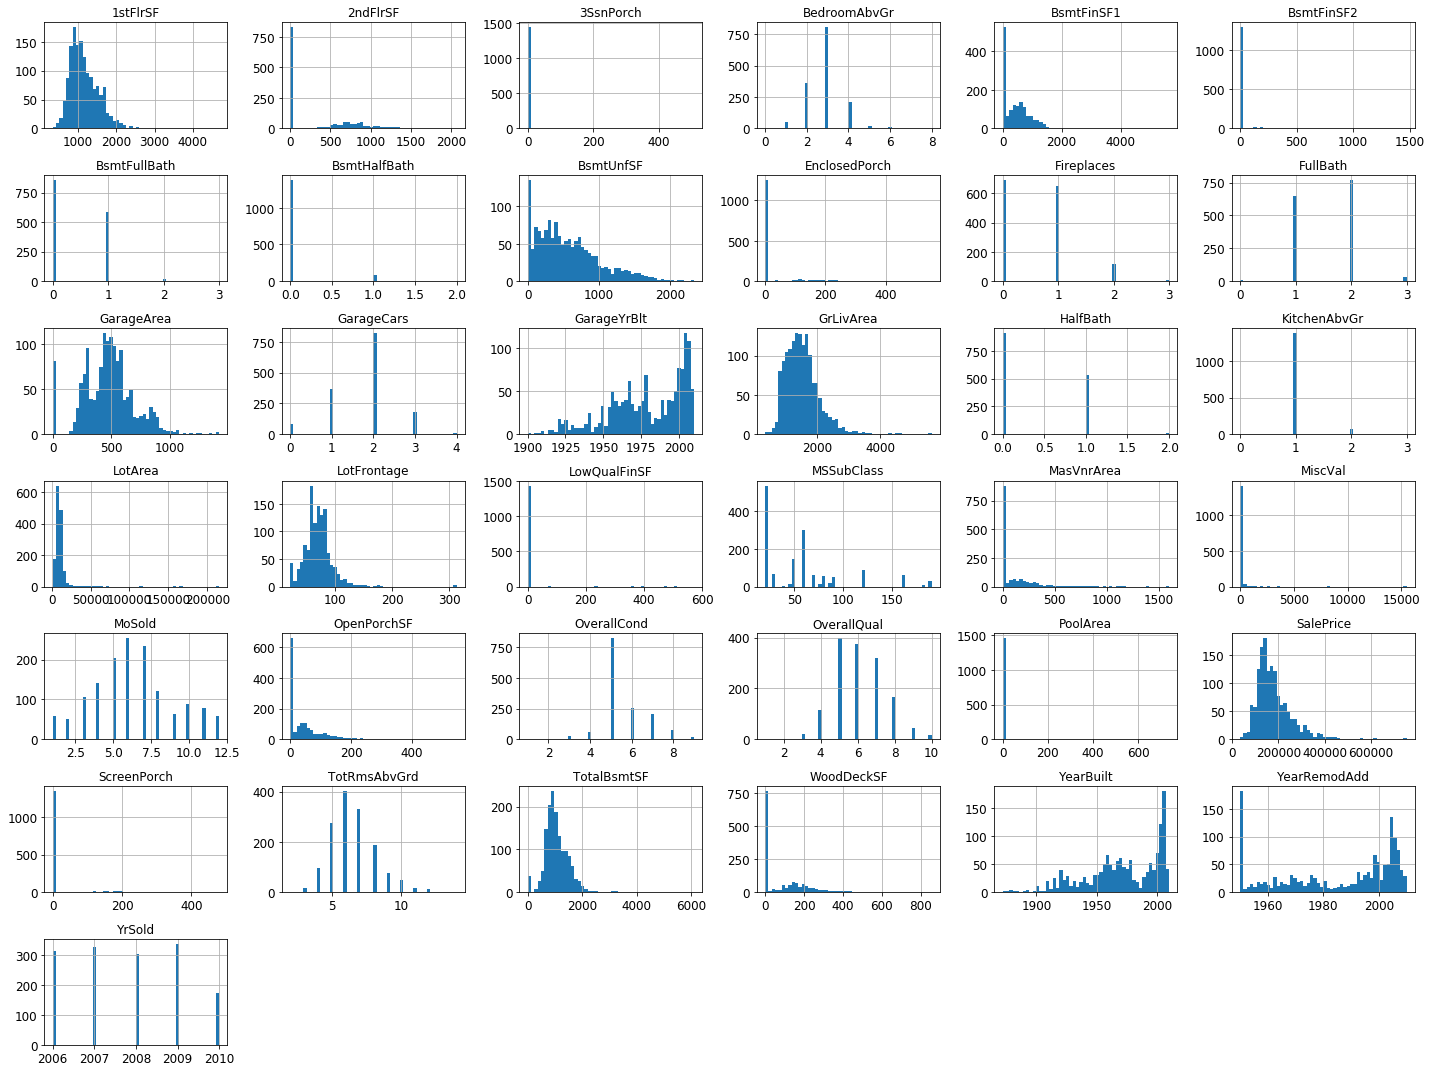

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Prepare the data for Machine Learning algorithms

In [6]:
train_labels = train["SalePrice"].copy()
train = train.drop("SalePrice", axis=1) # drop labels for training set

Separate numerical features from categorical features

In [7]:
train_num = train.select_dtypes(include=[np.number])
train_cat = train.select_dtypes(include=[np.object])

Imput missing values

In [8]:
from sklearn.preprocessing import Imputer

#categorical features where missing values must be replaced
train["MasVnrType"].fillna(train['MasVnrType'].value_counts().index[0], inplace = True)
train["Electrical"].fillna(train['Electrical'].value_counts().index[0], inplace = True)

test["MSZoning"].fillna(test['MSZoning'].value_counts().index[0], inplace = True)
test["Exterior1st"].fillna(test['Exterior1st'].value_counts().index[0], inplace = True)
test["Utilities"].fillna(test['Utilities'].value_counts().index[0], inplace = True)
test["Exterior2nd"].fillna(test['Exterior2nd'].value_counts().index[0], inplace = True)
test["MasVnrType"].fillna(test['MasVnrType'].value_counts().index[0], inplace = True)
test["KitchenQual"].fillna(test['KitchenQual'].value_counts().index[0], inplace = True)
test["Functional"].fillna(test['Functional'].value_counts().index[0], inplace = True)
test["PavedDrive"].fillna(test['PavedDrive'].value_counts().index[0], inplace = True)
test["SaleType"].fillna(test['SaleType'].value_counts().index[0], inplace = True)




#Categorical features where missing values should be treated as a separate category by itself
train["Alley"].fillna("No", inplace = True)
train["BsmtQual"].fillna("No", inplace = True)
train["BsmtCond"].fillna("No", inplace = True)
train["BsmtExposure"].fillna("No", inplace = True)
train["BsmtFinType1"].fillna("No", inplace = True)
train["BsmtFinType2"].fillna("No", inplace = True)
train["FireplaceQu"].fillna("No", inplace = True)
train["GarageType"].fillna("No", inplace = True)
train["GarageFinish"].fillna("No", inplace = True)
train["GarageQual"].fillna("No", inplace = True)
train["GarageCond"].fillna("No", inplace = True)
train["PoolQC"].fillna("No", inplace = True)
train["Fence"].fillna("No", inplace = True)
train["MiscFeature"].fillna("No", inplace = True)

test["Alley"].fillna("No", inplace = True)
test["BsmtQual"].fillna("No", inplace = True)
test["BsmtCond"].fillna("No", inplace = True)
test["BsmtExposure"].fillna("No", inplace = True)
test["BsmtFinType1"].fillna("No", inplace = True)
test["BsmtFinType2"].fillna("No", inplace = True)
test["FireplaceQu"].fillna("No", inplace = True)
test["GarageType"].fillna("No", inplace = True)
test["GarageFinish"].fillna("No", inplace = True)
test["GarageQual"].fillna("No", inplace = True)
test["GarageCond"].fillna("No", inplace = True)
test["PoolQC"].fillna("No", inplace = True)
test["Fence"].fillna("No", inplace = True)
test["MiscFeature"].fillna("No", inplace = True)

Preprocess the categorical input features:

In [9]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

Now let's build a pipeline for preprocessing the numerical attributes:

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


And a transformer to just select a subset of the Pandas DataFrame columns:

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [12]:
num_attribs = list(train_num)
cat_attribs = list(train_cat)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [14]:
train_prepared = full_pipeline.fit_transform(train)
train_prepared

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  0.        ,
         1.        ,  0.        ]])

# Select and train a model

Our linear regression:

In [15]:
n_exa_train =len(train)
n_exa_test =len(test)

#Añadimos columnas de 1's para términos independientes
X_train  = np.concatenate((np.ones([n_exa_train,1]),train_prepared ), axis=1)
n_features = X_train.shape[1]#número de características en X

alpha = 0.01 #ratio de aprendizaje
iters = 1500 #cantidad de iteraciones
theta = np.zeros(n_features) # inicializar con un vector de ceros.

def computeCost(X,y,theta):
    m = X.shape[0] #tamaño en filas del conjunto de entrenamiento
    h_theta = np.dot(X,theta) #guarda los resultados de la hipotesis h(x), matriz de m filas    
    resultado = np.power( (h_theta-y) , 2)
    return ( np.sum(resultado) ) / (2*m) 


def gradientDescent(X,y,theta,iters,alpha):
    costos = np.zeros(iters) #vector de costos para cada iteración
    m = X.shape[0] #tamaño en filas del conjunto de entrenamiento    
    for i in range(iters):
        costos[i] = computeCost(X,y,theta)
        h_theta = np.dot(X,theta) #guarda los resultados de la hipotesis h(x), matriz de m filas
        derivada = h_theta - y # sum[ (h(x)-y)]
        derivada = derivada / m
        gradiente = np.dot( np.transpose(X) ,derivada ) # sum[ (h(x)-y)*x ] / m
        theta = theta - (gradiente*alpha)
    return theta, costos

def predict(theta, data):
    return np.dot(data,theta)

theta,cost = gradientDescent(X_train,train_labels,theta,iters,alpha)

In [16]:
#from sklearn.linear_model import LinearRegression

#lin_reg = LinearRegression()
#lin_reg.fit(train_prepared, train_labels)

In [17]:
# let's try the full pipeline on a few training instances
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

#print("Predictions:", lin_reg.predict(some_data_prepared))
some_data_prepared  = np.concatenate((np.ones([len(some_data),1]),some_data_prepared ), axis=1)
print("Predictions:", predict(theta, some_data_prepared))

Predictions: [211979.98140461 195266.88925535 216692.9441932  189892.33505608
 291754.526043  ]


Compare against the actual values:

In [18]:
print("Labels:", list(some_labels))

Labels: [208500, 181500, 223500, 140000, 250000]


In [19]:
from sklearn.metrics import mean_squared_error

#train_predictions = lin_reg.predict(train_prepared)
train_predictions = predict(theta,X_train)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

27561.432458712865

In [20]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_labels, train_predictions)
lin_mae

16209.284088568958

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [22]:
train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [36517.28174571 39094.97033516 33291.09712626 48204.59232294
 43419.43431324 28490.08695888 34384.38836616 32295.71021738
 67647.07345673 38133.77328132]
Mean: 40147.840812379014
Standard deviation: 10620.545307235963


In [25]:
"""lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)"""

'lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,\n                             scoring="neg_mean_squared_error", cv=10)\nlin_rmse_scores = np.sqrt(-lin_scores)\ndisplay_scores(lin_rmse_scores)'

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_prepared, train_labels)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12751.816458273162

In [28]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_prepared, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [26916.42399224 26449.60991117 24702.23350169 43266.99808112
 36229.39621222 28131.27431218 27187.47611856 24818.16308399
 45918.57533539 29728.34519487]
Mean: 31334.849574344844
Standard deviation: 7341.042972131938


In [29]:
"""scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()"""

'scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)\npd.Series(np.sqrt(-scores)).describe()'

In [30]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_prepared, train_labels)
housing_predictions = svm_reg.predict(train_prepared)
svm_mse = mean_squared_error(train_labels, train_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

12751.816458273162

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

The best hyperparameter combination found:

In [32]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [33]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

46266.38979875181 {'max_features': 2, 'n_estimators': 3}
39947.57391130837 {'max_features': 2, 'n_estimators': 10}
37394.11933336973 {'max_features': 2, 'n_estimators': 30}
45581.58889340534 {'max_features': 4, 'n_estimators': 3}
38162.62000614212 {'max_features': 4, 'n_estimators': 10}
37176.86786313784 {'max_features': 4, 'n_estimators': 30}
44737.02738057996 {'max_features': 6, 'n_estimators': 3}
37470.99950109217 {'max_features': 6, 'n_estimators': 10}
34665.926157253234 {'max_features': 6, 'n_estimators': 30}
41583.49544271162 {'max_features': 8, 'n_estimators': 3}
35847.534903701766 {'max_features': 8, 'n_estimators': 10}
33193.75308265823 {'max_features': 8, 'n_estimators': 30}
45243.01312060463 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
39111.981737243725 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
44101.621110936016 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
36740.25440773908 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [35]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017801,0.007278,0.002200,7.484302e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.973428e+09,-2.319283e+09,...,-2.140579e+09,4.347215e+08,18,-5.270829e+08,-5.335152e+08,-5.703397e+08,-6.108089e+08,-5.047087e+08,-5.492911e+08,3.730191e+07
1,0.052003,0.009655,0.006200,3.544175e-03,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.290585e+09,-1.400498e+09,...,-1.595809e+09,4.239287e+08,11,-3.591606e+08,-3.277423e+08,-3.716126e+08,-3.485519e+08,-3.153518e+08,-3.444838e+08,2.047867e+07
2,0.153009,0.018613,0.006601,1.019889e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.045947e+09,-1.218399e+09,...,-1.398320e+09,4.348546e+08,7,-2.332524e+08,-2.361572e+08,-2.420314e+08,-2.630126e+08,-2.398537e+08,-2.428614e+08,1.051747e+07
3,0.031402,0.015933,0.006400,5.851955e-03,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.914536e+09,-2.250932e+09,...,-2.077681e+09,3.024282e+08,17,-5.412409e+08,-5.438464e+08,-4.881534e+08,-4.830677e+08,-3.409262e+08,-4.794469e+08,7.381423e+07
4,0.049403,0.010764,0.005600,2.800162e-03,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.059985e+09,-1.462396e+09,...,-1.456386e+09,3.327547e+08,9,-2.760426e+08,-3.306690e+08,-3.063645e+08,-2.958258e+08,-2.355320e+08,-2.888868e+08,3.197211e+07
5,0.082605,0.006499,0.006800,2.785866e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.663850e+08,-1.392526e+09,...,-1.382120e+09,4.129422e+08,6,-2.031693e+08,-2.197011e+08,-2.084110e+08,-2.106463e+08,-2.116413e+08,-2.107138e+08,5.363938e+06
6,0.042002,0.029088,0.002400,1.019777e-03,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.632083e+09,-2.123396e+09,...,-2.001402e+09,3.950599e+08,15,-6.069996e+08,-5.662106e+08,-4.053801e+08,-4.500797e+08,-4.292556e+08,-4.915851e+08,7.991048e+07
7,0.030002,0.004147,0.002400,4.899792e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.135466e+09,-1.438269e+09,...,-1.404076e+09,3.613498e+08,8,-3.401236e+08,-2.809107e+08,-2.630770e+08,-2.685196e+08,-2.589660e+08,-2.823194e+08,2.983086e+07
8,0.104006,0.027197,0.005400,4.900182e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-8.962533e+08,-1.294259e+09,...,-1.201726e+09,3.410046e+08,2,-2.156768e+08,-1.842655e+08,-1.810596e+08,-2.140268e+08,-2.155657e+08,-2.021189e+08,1.592903e+07
9,0.018001,0.005099,0.001800,7.482645e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.592191e+09,-1.985868e+09,...,-1.729187e+09,3.625438e+08,12,-5.211369e+08,-6.007797e+08,-3.967240e+08,-3.541129e+08,-4.026896e+08,-4.550886e+08,9.158215e+07


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000BF08B00>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000BF08E10>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [37]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

33372.74000048702 {'max_features': 7, 'n_estimators': 180}
38389.2430356645 {'max_features': 5, 'n_estimators': 15}
35903.39406810792 {'max_features': 3, 'n_estimators': 72}
37221.33876377988 {'max_features': 5, 'n_estimators': 21}
33398.6792408091 {'max_features': 7, 'n_estimators': 122}
35816.52279066106 {'max_features': 3, 'n_estimators': 75}
35767.29253010483 {'max_features': 3, 'n_estimators': 88}
34887.01045907782 {'max_features': 5, 'n_estimators': 100}
35636.43324324352 {'max_features': 3, 'n_estimators': 150}
50427.659152039574 {'max_features': 5, 'n_estimators': 2}


In [38]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.93727153e-03, 1.39142420e-02, 2.10819025e-02, 4.36177315e-02,
       4.35232662e-03, 2.20693140e-02, 3.92052986e-02, 1.47807201e-02,
       4.95343894e-02, 8.46567544e-04, 1.08139749e-02, 1.95986539e-02,
       4.83408958e-02, 2.22663934e-02, 7.98405265e-04, 4.72939671e-02,
       3.23440514e-03, 3.86435704e-04, 1.77342982e-02, 1.08544429e-02,
       5.10830653e-03, 8.26561048e-04, 2.13808392e-02, 1.37013554e-02,
       1.36191481e-02, 4.52930698e-02, 2.32990417e-02, 8.69042580e-03,
       1.63331285e-02, 2.16016140e-03, 2.81041837e-04, 3.13064533e-03,
       1.58193726e-03, 3.03767516e-04, 7.45786341e-03, 3.69271662e-03,
       6.67914728e-04, 3.71682249e-04, 1.60508580e-04, 3.56607840e-03,
       2.04927465e-03, 6.46230594e-05, 2.07698313e-04, 2.83527673e-04,
       9.46500935e-04, 2.44682873e-04, 5.00741983e-03, 7.55234666e-04,
       9.69917879e-04, 1.85581257e-03, 1.48671654e-03, 8.72158138e-04,
       8.75490576e-04, 1.50076583e-03, 1.91944831e-05, 9.74523572e-07,
      

In [39]:
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs +  cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.04953438939926021, 'BsmtFinSF1'),
 (0.0483408958231678, '1stFlrSF'),
 (0.047293967110642134, 'GrLivArea'),
 (0.045293069835278955, 'GarageCars'),
 (0.04361773154560124, 'OverallQual'),
 (0.039205298632906005, 'YearRemodAdd'),
 (0.023299041707542864, 'GarageArea'),
 (0.022266393391674053, '2ndFlrSF'),
 (0.02206931396455711, 'YearBuilt'),
 (0.02138083918420092, 'TotRmsAbvGrd'),
 (0.021081902502722478, 'LotArea'),
 (0.019598653928811164, 'TotalBsmtSF'),
 (0.017734298202317086, 'FullBath'),
 (0.01633312846829208, 'OpenPorchSF'),
 (0.014780720110447355, 'MasVnrArea'),
 (0.013914241968105619, 'LotFrontage'),
 (0.013701355410309424, 'Fireplaces'),
 (0.013619148140799646, 'GarageYrBlt'),
 (0.010854442945467759, 'HalfBath'),
 (0.010813974917859799, 'BsmtUnfSF'),
 (0.008690425802682002, 'WoodDeckSF'),
 (0.007457863410224173, 'MoSold'),
 (0.0069372715292645125, 'MSSubClass'),
 (0.00510830653339554, 'BedroomAbvGr'),
 (0.004352326617713215, 'OverallCond'),
 (0.003692716623018242, 'YrSold'),
 (0

In [40]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(test)
final_predictions = final_model.predict(X_test_prepared)

final_predictions

array([128322.        , 151133.33333333, 178857.9       , ...,
       164867.5       , 108315.        , 242579.16666667])

Write the final predictions

In [41]:
import csv

id = 1461

csv = open("submission.csv", "w")  
columnTitleRow = "Id, SalePrice\n"
csv.write(columnTitleRow)

for i in range(final_predictions.size):
    row = str(id) + "," + str(final_predictions[i]) + "\n"
    csv.write(row)
    id = id + 1
    
csv.close()